In [80]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load the dataset
df = pd.read_csv("Updated_Movie_Classification.csv")  # Replace with your path if needed

# Step 3: Drop missing values
df.dropna(inplace=True)

# Step 4: Encode the target variable
label_encoder = LabelEncoder()
df['movie_status'] = label_encoder.fit_transform(df['movie_status'])  # Hit/Not Hit to 1/0




In [81]:
df.head(10)

,score,votes,runtime,budget,gross,movie_status
0,8.4,927000.0,146.0,19000000.0,46998772.0,1
1,5.8,65000.0,104.0,4500000.0,58853106.0,1
2,8.7,1200000.0,124.0,18000000.0,538375067.0,1
3,7.7,221000.0,88.0,3500000.0,83453539.0,1
4,7.3,108000.0,98.0,6000000.0,39846344.0,1
5,6.4,123000.0,95.0,550000.0,39754601.0,1
6,7.9,188000.0,133.0,27000000.0,115229890.0,1
7,8.2,330000.0,129.0,18000000.0,23402427.0,0
8,6.8,101000.0,127.0,54000000.0,108185706.0,1
9,7.0,10000.0,100.0,10000000.0,15795189.0,0


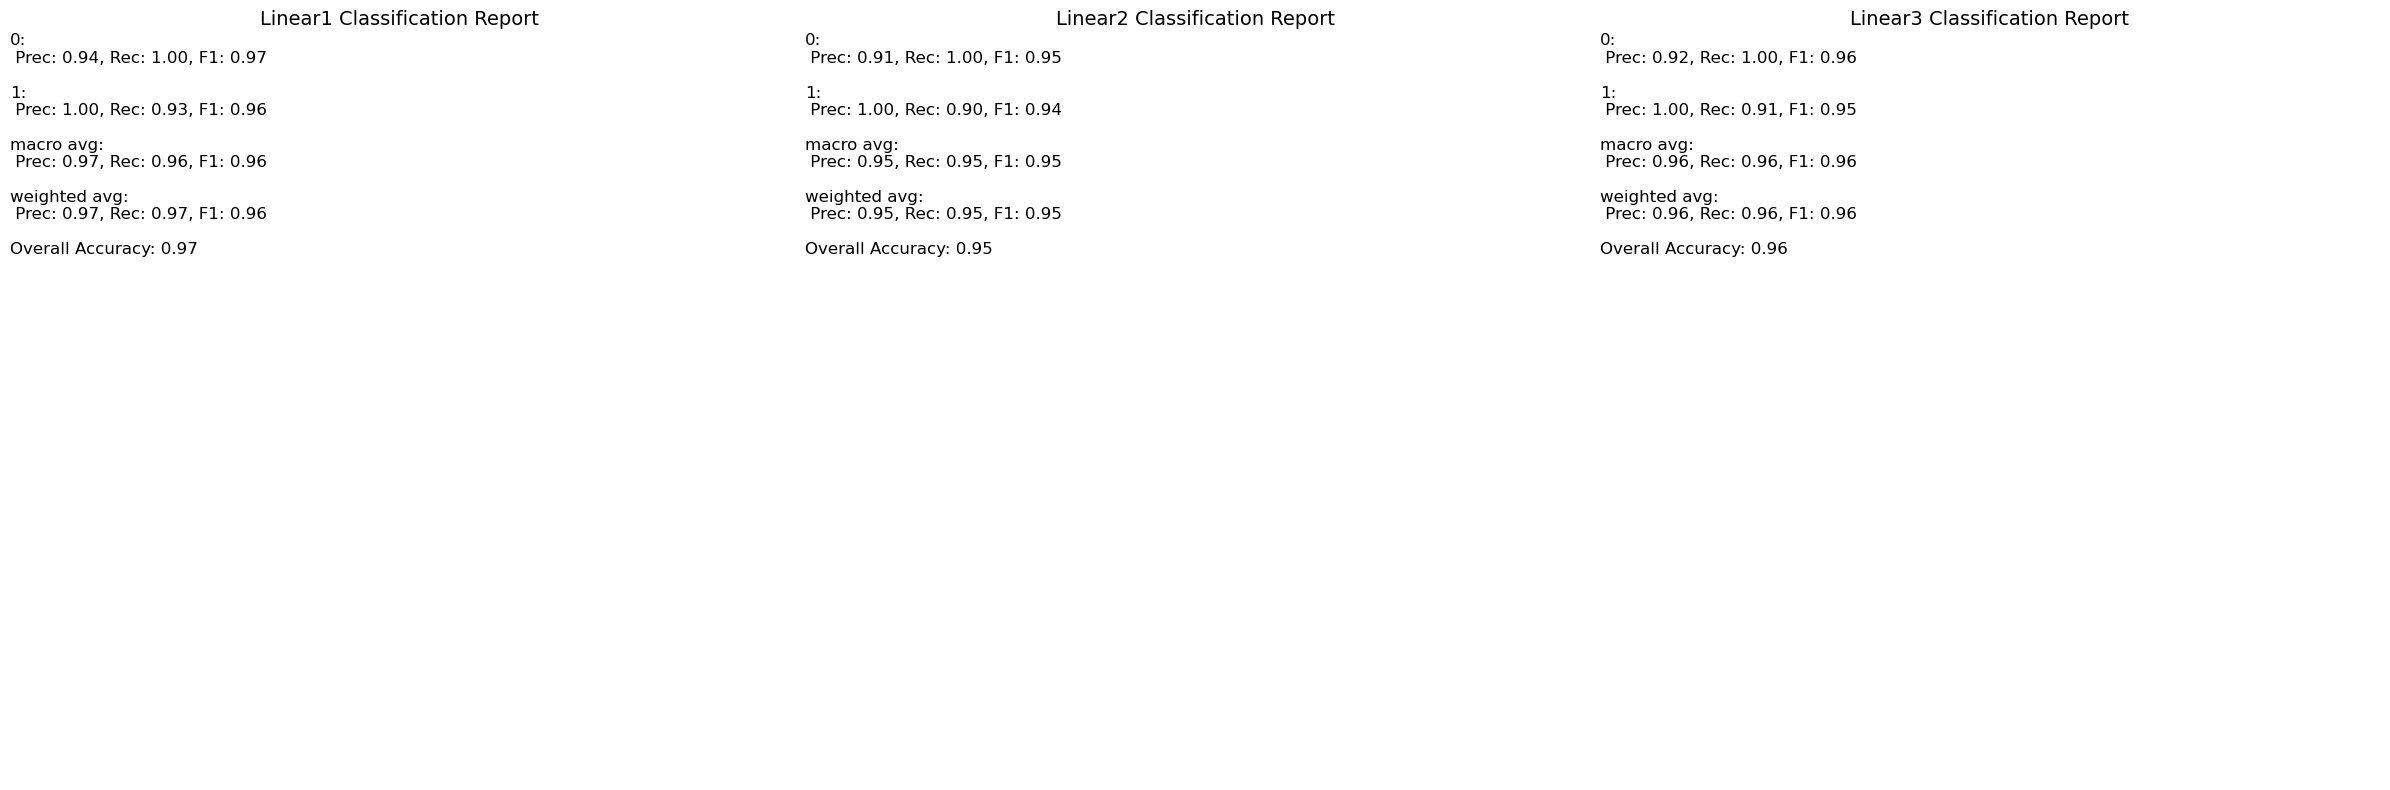

In [119]:
# Step 5: Feature selection and scaling
features = ['score', 'votes', 'runtime', 'budget', 'gross']
X = df[features]
y = df['movie_status']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)




# Step 7: Train and Evaluate SVM - Linear Kernel
clf_linear1 = SVC(kernel='linear', C=1.0)
clf_linear2 = SVC(kernel='linear', C=0.5)
clf_linear3 = SVC(kernel='linear', C=0.7)
clf_linear1.fit(X_train, y_train)
clf_linear2.fit(X_train, y_train)
clf_linear3.fit(X_train, y_train)
y_pred_linear1 = clf_linear1.predict(X_test)
y_pred_linear2 = clf_linear2.predict(X_test)
y_pred_linear3 = clf_linear3.predict(X_test)

# Define predictions and titles
kernels = ['Linear1', 'Linear2', 'Linear3']
predictions = [y_pred_linear1, y_pred_linear2, y_pred_linear3]

# Create 1 row, 3 columns for side-by-side
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

for i, pred in enumerate(predictions):
    # Turn off axes frame
    axes[i].axis('off')
    
    # Generate classification report and accuracy
    report = classification_report(y_test, pred, output_dict=True)
    acc = accuracy_score(y_test, pred)

    # Prepare the report text nicely
    class_report_text = ""
    for label, metrics in report.items():
        if isinstance(metrics, dict):
            class_report_text += f"{label}:\n"
            class_report_text += f" Prec: {metrics['precision']:.2f}, Rec: {metrics['recall']:.2f}, F1: {metrics['f1-score']:.2f}\n\n"
    
    class_report_text += f"Overall Accuracy: {acc:.2f}"

    # Write text into plot
    axes[i].text(0, 1, class_report_text, fontsize=12, ha='left', va='top')
    axes[i].set_title(f'{kernels[i]} Classification Report', fontsize=14)

plt.tight_layout()
plt.show()


In [120]:
columns = ['score', 'votes', 'runtime', 'budget', 'gross']
X_train_df = pd.DataFrame(X_train, columns=columns)

print(X_train_df.head(10))

      score     votes   runtime    budget     gross
0  0.422763 -0.585838 -0.946835 -0.858963 -0.525585
1 -1.030897 -0.608636 -0.008631 -0.503949 -0.530946
2 -3.938218 -0.582581 -0.450139 -0.840911 -0.542160
3 -0.096401 -0.482702 -0.063820 -0.383605 -0.300609
4 -1.134730 -0.542412  1.481457  0.242182 -0.495096
5 -0.096401 -0.346996  0.929572  0.819832 -0.378024
6  0.941928 -0.064729  0.984761 -0.022574 -0.244499
7 -1.446229 -0.598865 -1.057212 -0.455811 -0.532812
8  0.215097 -0.570639 -1.443531 -0.311399 -0.312959
9 -1.030897 -0.265573 -0.726081  0.097770 -0.347021


In [121]:
X_test_df = pd.DataFrame(X_test, columns=columns)

print(X_test_df.head(10))

      score     votes   runtime    budget     gross
0 -2.484557 -0.590723 -0.615704 -0.142918 -0.544584
1  0.734262  0.108973  1.812588 -0.094780 -0.380185
2 -0.823231 -0.330712 -0.836458  0.025564 -0.322939
3 -0.200234 -0.081014  1.371080  0.819832  0.169594
4 -1.342396 -0.615150 -0.505327 -0.455811 -0.531555
5 -1.342396 -0.384994 -1.112400  1.301207  0.423691
6 -2.484557 -0.604294 -0.560516 -0.804808 -0.493526
7  0.630429 -0.238432  1.039949 -0.191055 -0.438289
8 -0.304067 -0.086442 -0.781269 -0.672430 -0.306656
9 -0.096401 -0.583124 -0.008631 -0.624292 -0.481906


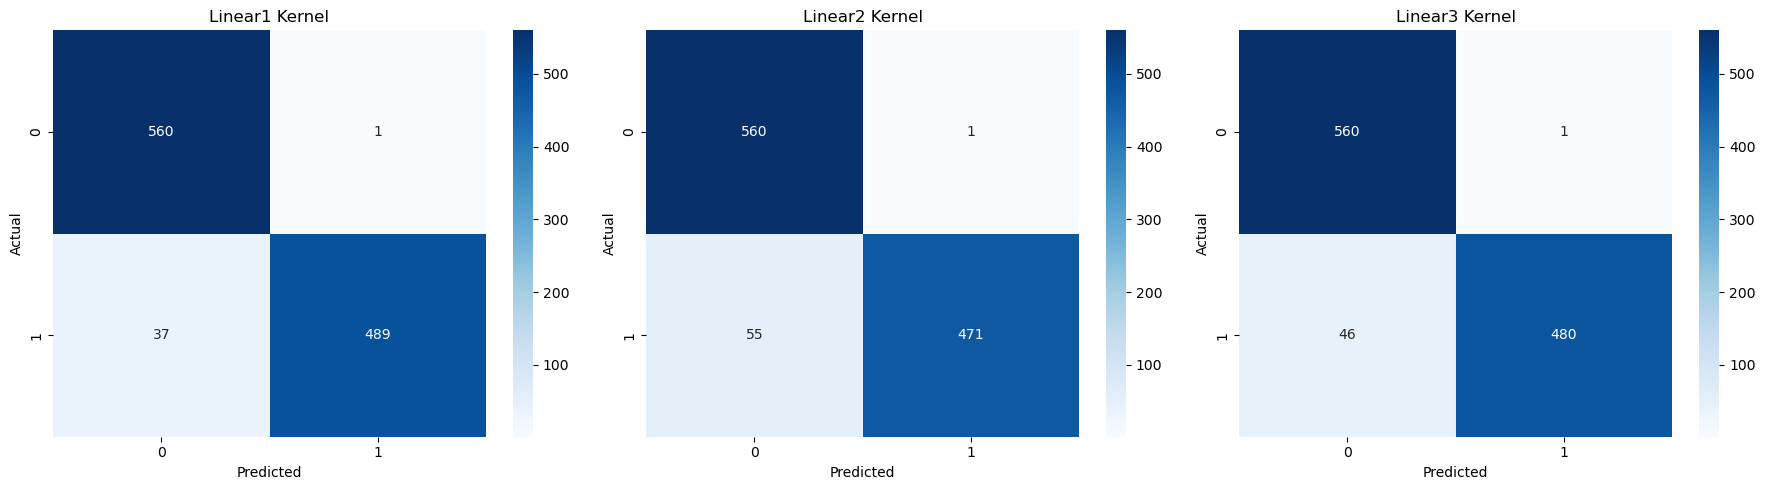

In [122]:
# Step 10: Optional Visualization - Confusion Matrix Heatmaps
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
kernels = ['Linear1', 'Linear2', 'Linear3']
predictions = [y_pred_linear1, y_pred_linear2, y_pred_linear3]

for i, pred in enumerate(predictions):
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{kernels[i]} Kernel')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [123]:
# Step 8: Train and Evaluate SVM - RBF Kernel
clf_rbf1 = SVC(kernel='rbf', C=2.0)
clf_rbf1.fit(X_train, y_train)
y_pred_rbf1 = clf_rbf1.predict(X_test)

clf_rbf2 = SVC(kernel='rbf', C=1.5)
clf_rbf2.fit(X_train, y_train)
y_pred_rbf2 = clf_rbf2.predict(X_test)

clf_rbf3 = SVC(kernel='rbf', C=2.5)
clf_rbf3.fit(X_train, y_train)
y_pred_rbf3 = clf_rbf3.predict(X_test)





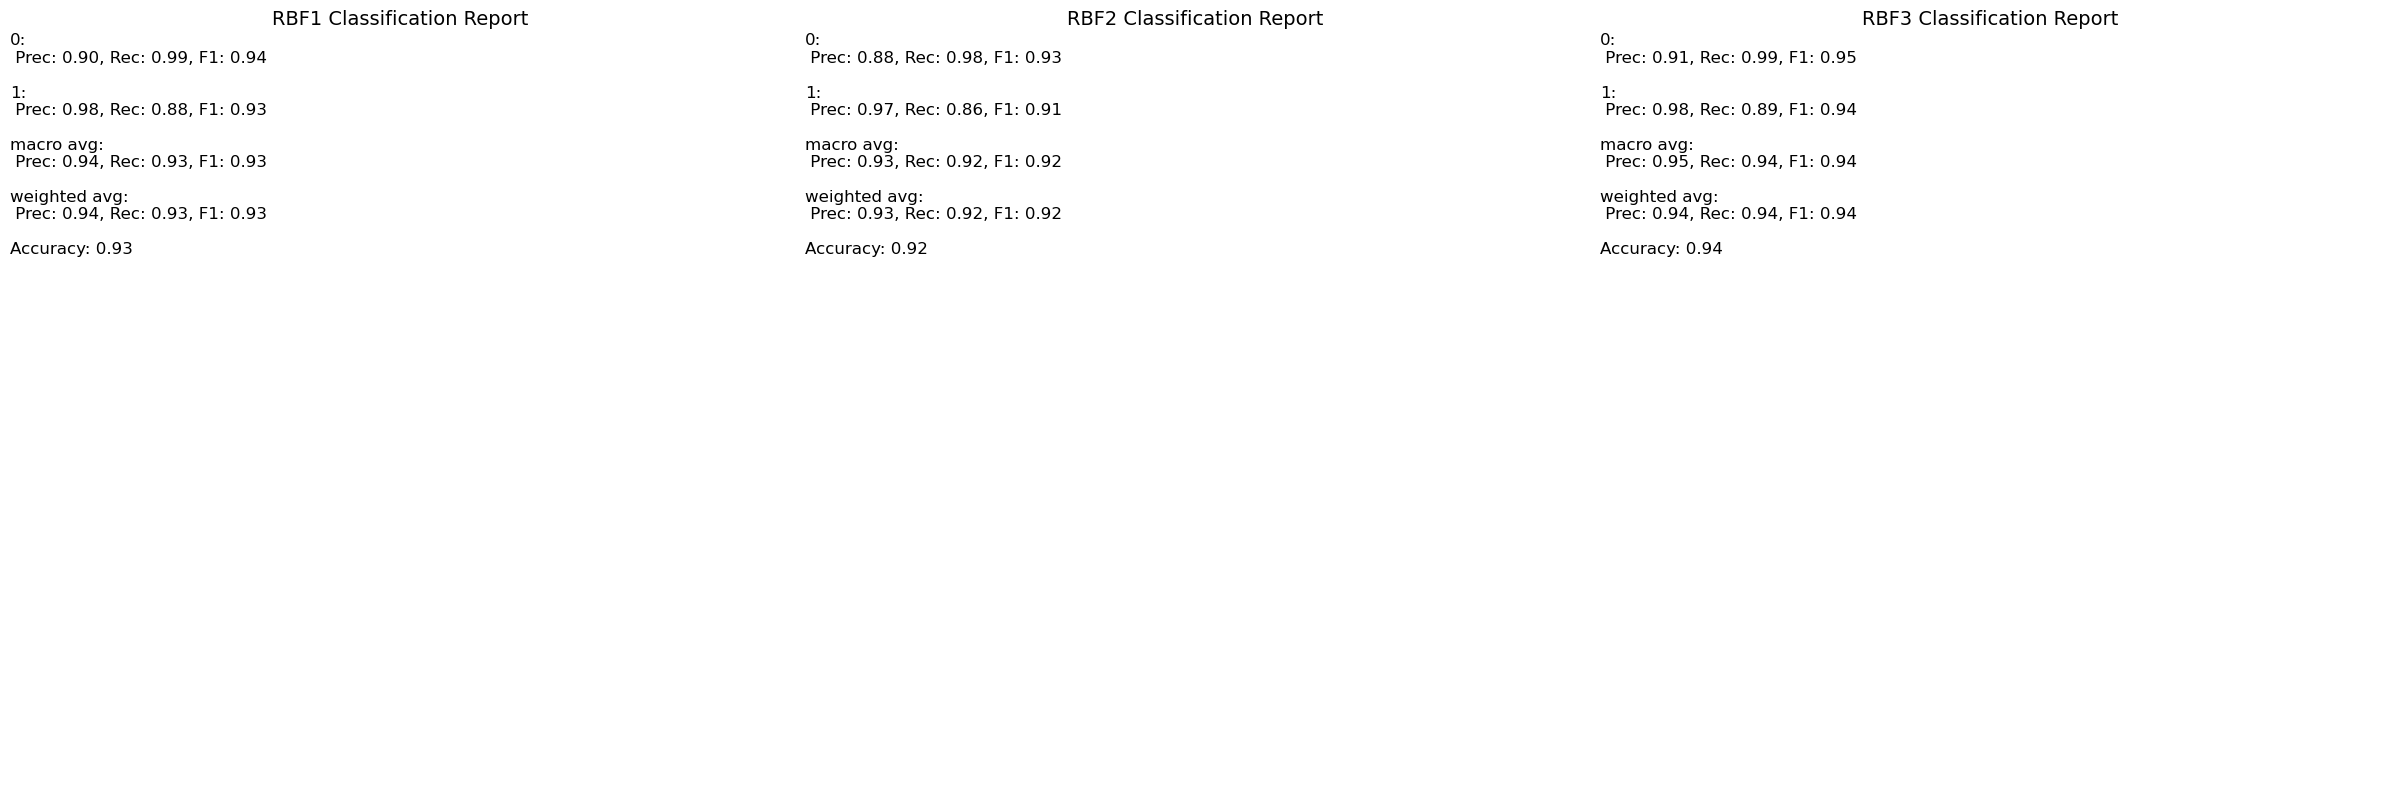

In [124]:
# Define predictions and labels
kernels = ['RBF1', 'RBF2', 'RBF3']
predictions = [y_pred_rbf1, y_pred_rbf2, y_pred_rbf3]

# Create 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

for i, pred in enumerate(predictions):
    axes[i].axis('off')  # Hide plot axes

    # Generate report and accuracy
    acc = accuracy_score(y_test, pred)
    report = classification_report(y_test, pred, output_dict=True)

    # Format the report nicely
    report_text = ""
    for label, metrics in report.items():
        if isinstance(metrics, dict):
            report_text += f"{label}:\n"
            report_text += f" Prec: {metrics['precision']:.2f}, Rec: {metrics['recall']:.2f}, F1: {metrics['f1-score']:.2f}\n\n"
    report_text += f"Accuracy: {acc:.2f}"

    # Display text
    axes[i].text(0, 1, report_text, fontsize=12, ha='left', va='top')
    axes[i].set_title(f"{kernels[i]} Classification Report", fontsize=14)

plt.tight_layout()
plt.show()

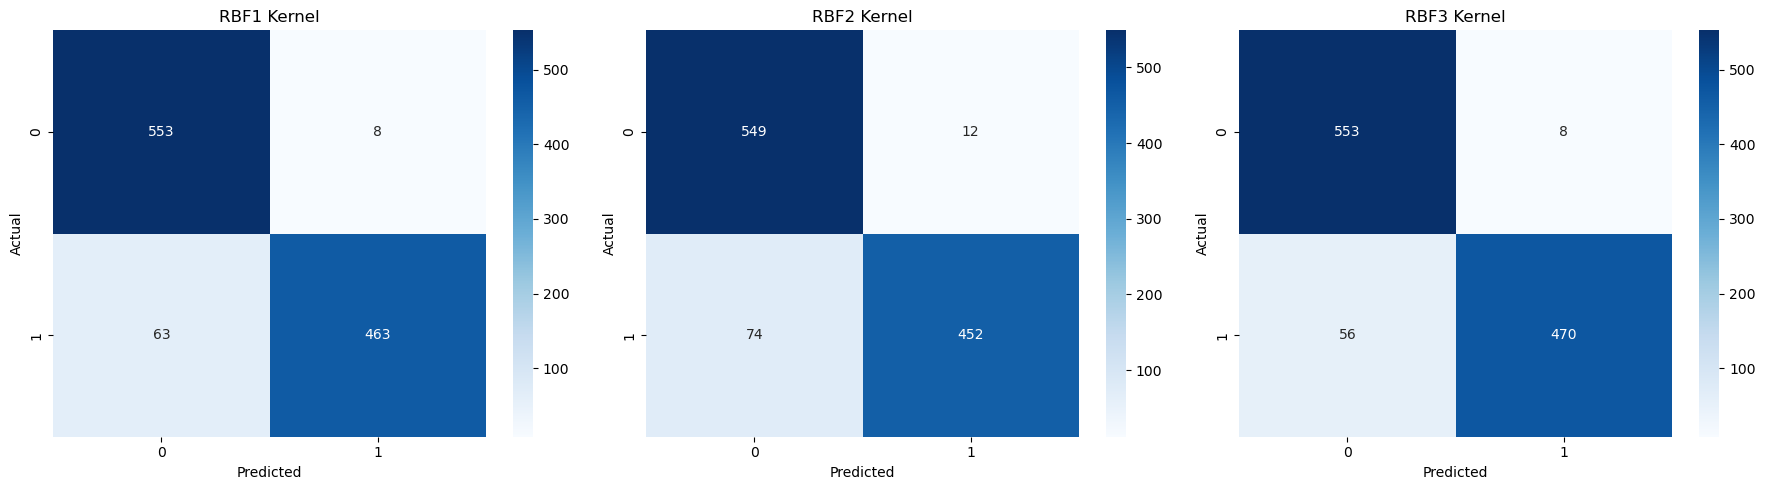

In [125]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
kernels = ['RBF1', 'RBF2', 'RBF3']
predictions = [y_pred_rbf1, y_pred_rbf2, y_pred_rbf3]

for i, pred in enumerate(predictions):
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{kernels[i]} Kernel')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [126]:
# Step 9: Train and Evaluate SVM - Polynomial Kernel
clf_poly1 = SVC(kernel='poly', degree=3, C=1.0)
clf_poly1.fit(X_train, y_train)
y_pred_poly1 = clf_poly1.predict(X_test)

clf_poly2 = SVC(kernel='poly', degree=3, C=2.0)
clf_poly2.fit(X_train, y_train)
y_pred_poly2 = clf_poly2.predict(X_test)

clf_poly3 = SVC(kernel='poly', degree=3, C=3.0)
clf_poly3.fit(X_train, y_train)
y_pred_poly3 = clf_poly3.predict(X_test)





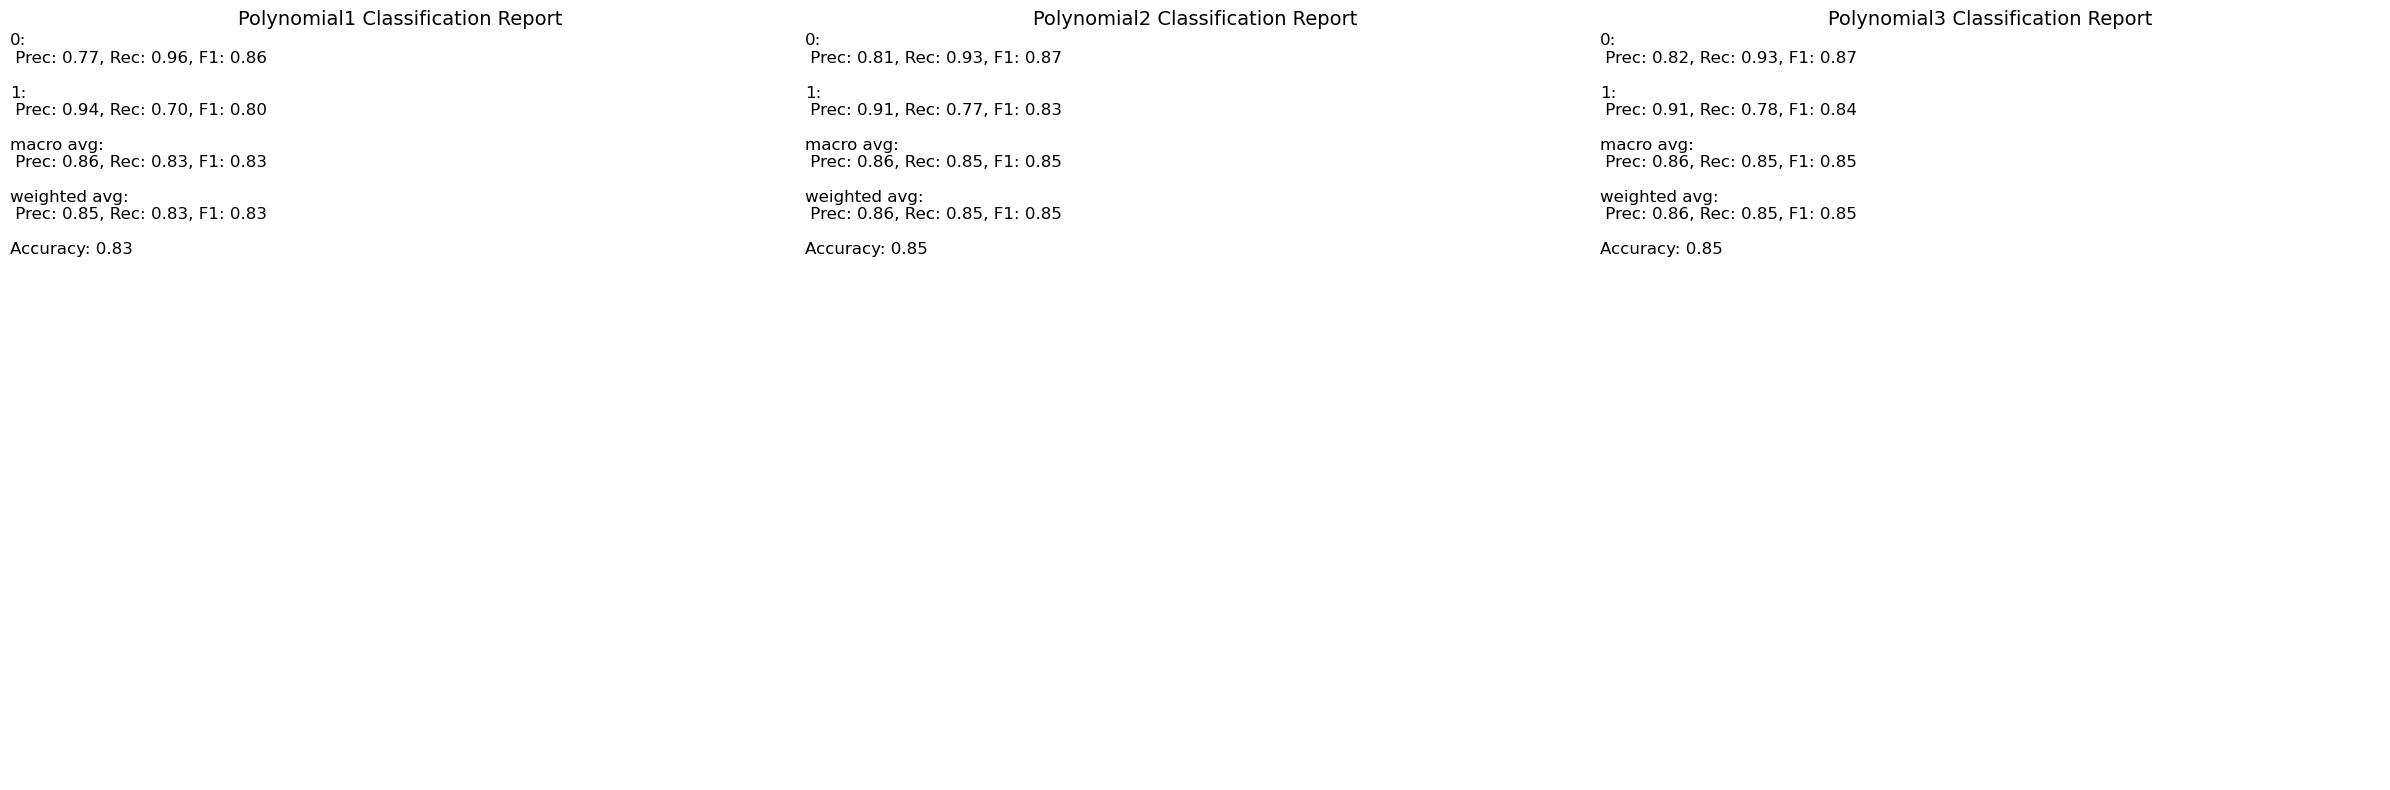

In [127]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score

# Define prediction names and results
kernels = ['Polynomial1', 'Polynomial2', 'Polynomial3']
predictions = [y_pred_poly1, y_pred_poly2, y_pred_poly3]

# Set up 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

for i, pred in enumerate(predictions):
    axes[i].axis('off')  # Hide axis frame
    
    # Calculate report and accuracy
    acc = accuracy_score(y_test, pred)
    report = classification_report(y_test, pred, output_dict=True)

    # Format report text nicely
    report_text = ""
    for label, metrics in report.items():
        if isinstance(metrics, dict):
            report_text += f"{label}:\n"
            report_text += f" Prec: {metrics['precision']:.2f}, Rec: {metrics['recall']:.2f}, F1: {metrics['f1-score']:.2f}\n\n"
    report_text += f"Accuracy: {acc:.2f}"

    # Plot the text inside each panel
    axes[i].text(0, 1, report_text, fontsize=12, ha='left', va='top')
    axes[i].set_title(f"{kernels[i]} Classification Report", fontsize=14)

plt.tight_layout()
plt.show()


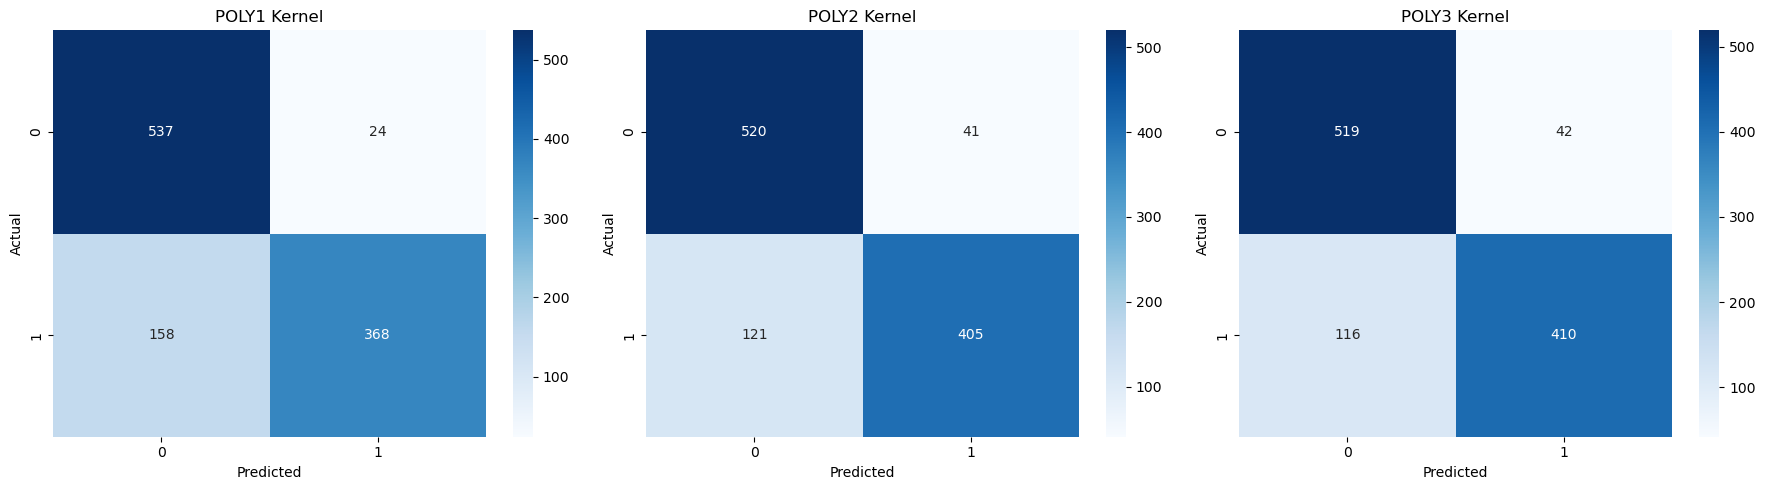

In [128]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
kernels = ['POLY1', 'POLY2', 'POLY3']
predictions = [y_pred_poly1,y_pred_poly2,y_pred_poly3]

for i, pred in enumerate(predictions):
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{kernels[i]} Kernel')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

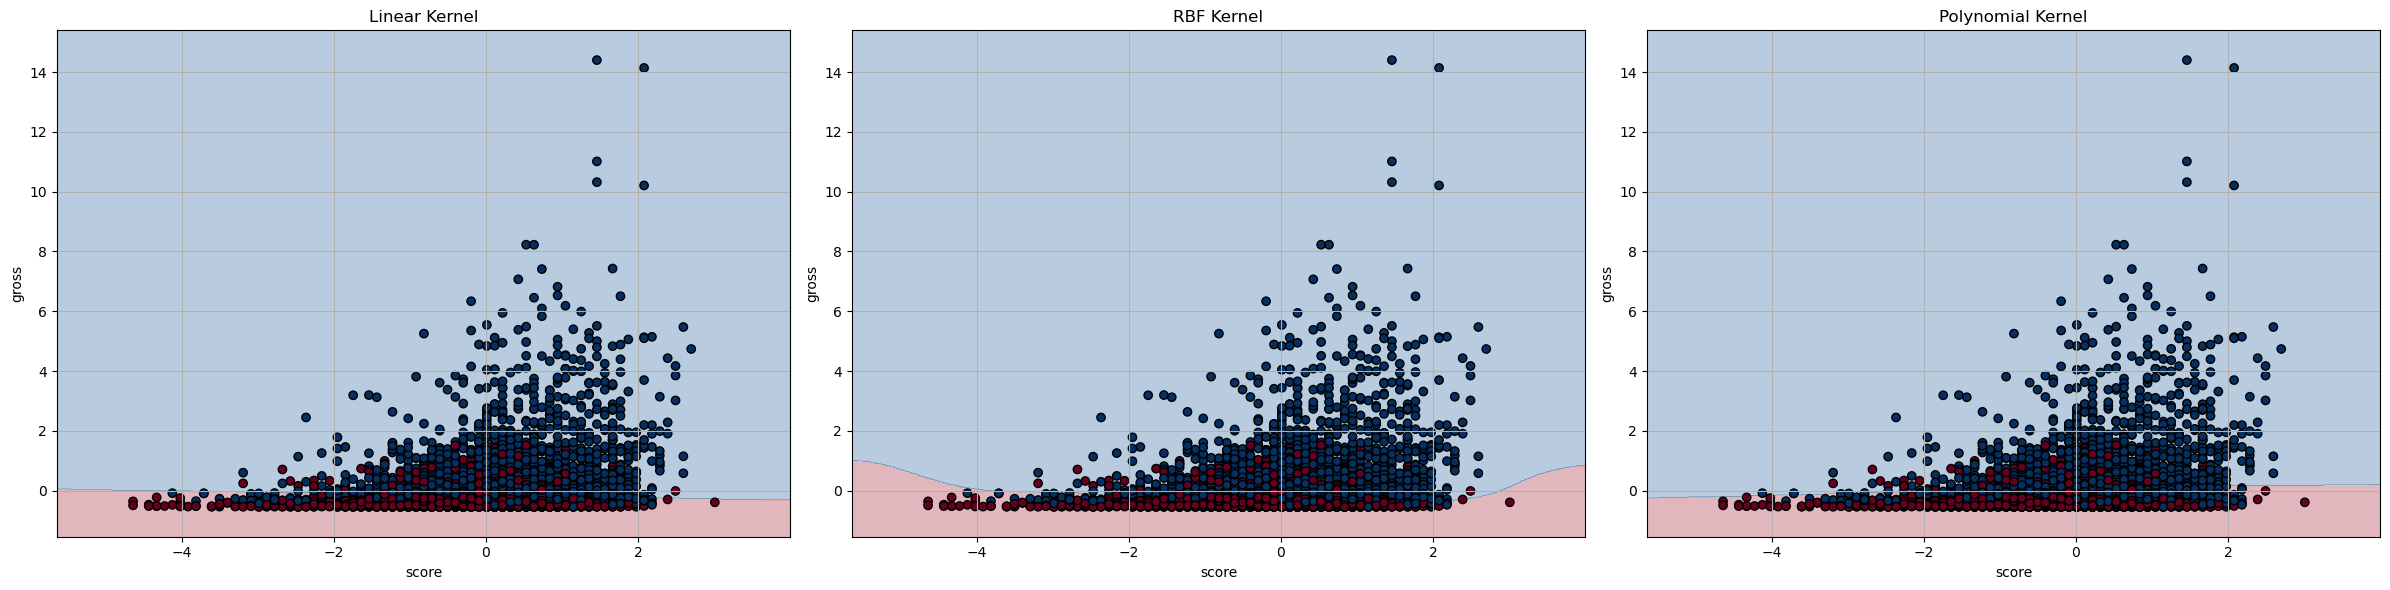

In [129]:
# Use only 2 numeric features for visualization
numeric_features = ['score', 'gross']
X_2d = df[numeric_features]
y_2d = df['movie_status']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_2d, y_2d, test_size=0.3, random_state=42, stratify=y_2d
)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = np.vstack((X_train_scaled, X_test_scaled))
y_all = np.hstack((y_train, y_test))

# Train models
clf_linear = SVC(kernel='linear', C=1.0).fit(X_train_scaled, y_train)
clf_rbf = SVC(kernel='rbf', C=2.5).fit(X_train_scaled, y_train)
clf_poly = SVC(kernel='poly', C=3.0, degree=3).fit(X_train_scaled, y_train)

# Create meshgrid for decision boundaries
h = 0.02
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]

# Prepare models and titles
models = [clf_linear, clf_rbf, clf_poly]
titles = ['Linear Kernel', 'RBF Kernel', 'Polynomial Kernel']

# Plot decision boundaries
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

for i, model in enumerate(models):
    Z = model.predict(grid).reshape(xx.shape)
    ax = axes[i]
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu)
    scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_all, cmap=plt.cm.RdBu, edgecolors='k')
    ax.set_title(f"{titles[i]}")
    ax.set_xlabel(numeric_features[0])
    ax.set_ylabel(numeric_features[1])
    ax.grid(True)

plt.tight_layout()
plt.show()